In [2]:
import pandas as pd
import numpy as np

In [5]:

#raw = pd.read_csv('https://github.com/sunnysavita10/Gemstone-Price-Prediction-End-to-End-Pipeline/blob/main/artifacts/raw.csv',sep=",")#-
raw = pd.read_csv('https://github.com/sunnysavita10/Gemstone-Price-Prediction-End-to-End-Pipeline/raw/main/artifacts/raw.csv', sep=",")#+
raw.to_csv('D:/Data-Sorting/MLOPS-project/experiment/raw.csv')

In [3]:
raw = pd.read_csv('D:/Data-Sorting/MLOPS-project/experiment/raw.csv')

In [4]:
raw.head()

,Unnamed: 0,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
raw.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [4]:
numeric_columns = [col for col in raw.columns if raw[col].dtype != 'O' ]
categorical_columns = [col for col in raw.columns if raw[col].dtype == 'O']

print(f"Numeric columns: {numeric_columns}")
print(f"Categorical columns: {categorical_columns}")

Numeric columns: ['Unnamed: 0', 'id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical columns: ['cut', 'color', 'clarity']


In [12]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
raw.drop(columns=['id'],inplace=True)

In [25]:
raw.duplicated().sum()

np.int64(0)

In [26]:
raw.isnull().any(axis=1).sum()

np.int64(0)

In [13]:
for col in categorical_columns:
    print(col)
    print(raw[col].unique())

cut
['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
color
['F' 'J' 'G' 'E' 'D' 'H' 'I']
clarity
['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [15]:
for col in categorical_columns:
    print(raw[col].value_counts())
    print('*'*15)

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
***************
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
***************
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
***************


In [12]:
continous_col = [col for col in categorical_columns if raw[col].unique()>25]
discrete_col = [col for col in categorical_columns if raw[col].unique()<25]

print(f"continous columns: {continous_col}")
print(f"discrete columns: {discrete_col}")

TypeError: '>' not supported between instances of 'str' and 'int'

In [8]:
import matplotlib.pyplot as plt

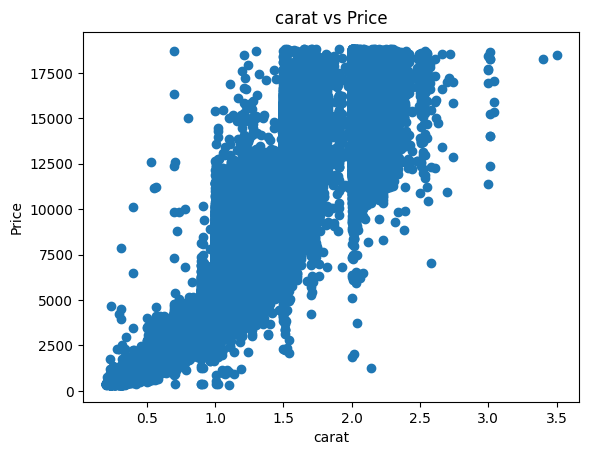

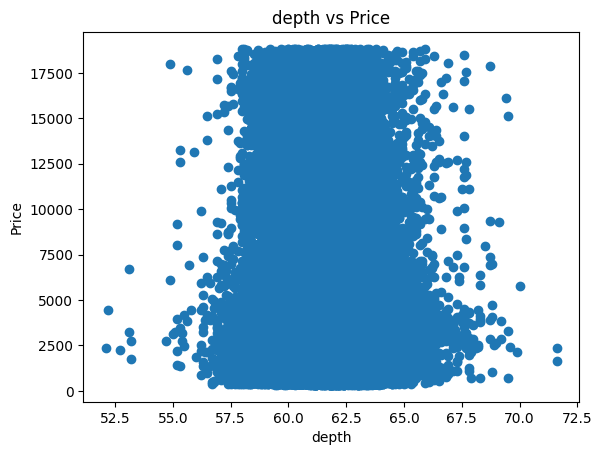

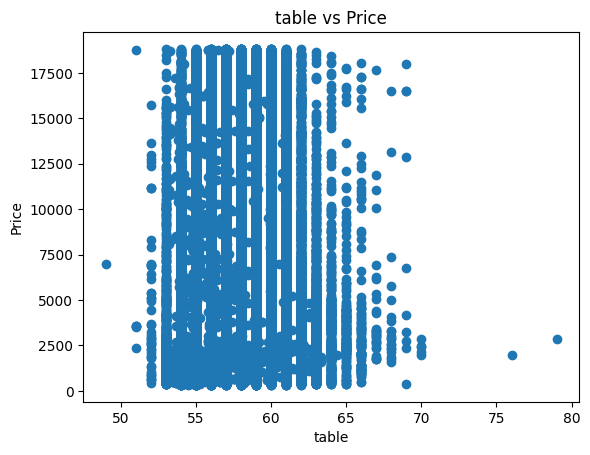

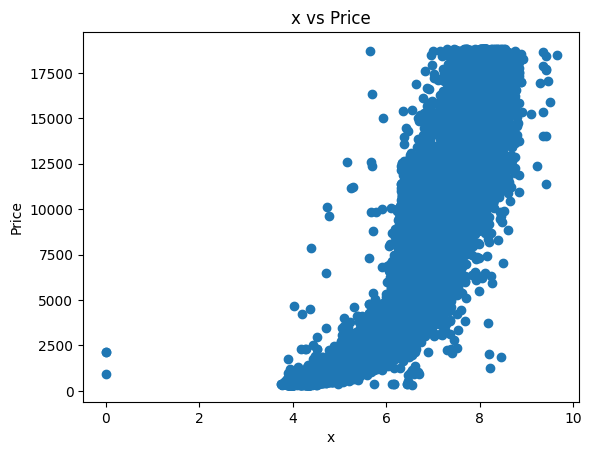

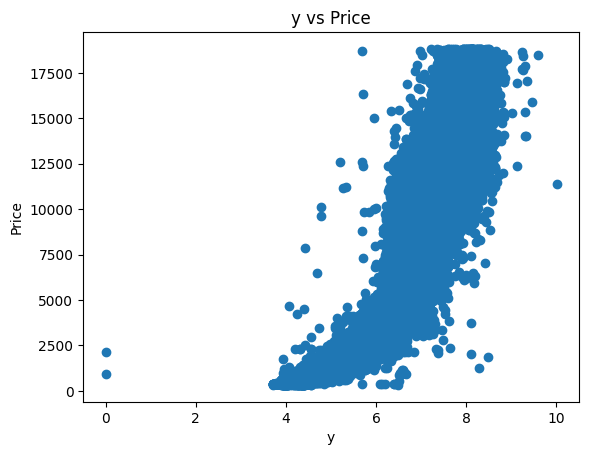

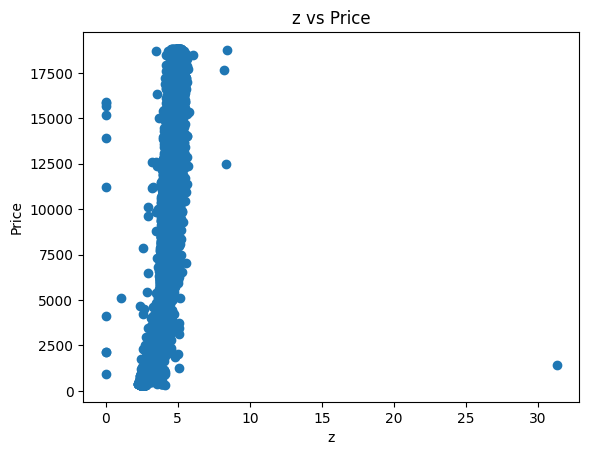

In [ ]:
import matplotlib.pyplot as plt

for col in numeric_columns:
    if col != 'price':
        plt.scatter(x=col, y='price', data=raw)
        plt.title(f'{col} vs Price')
        plt.xlabel(col)
        plt.ylabel('Price')

        plt.show()



In [18]:
raw.corr(method='spearman',numeric_only=True)

,Unnamed: 0,carat,depth,table,x,y,z,price
Unnamed: 0,1.000000,-0.000154,0.002166,0.002049,-0.000345,-0.000318,-0.000029,-0.000195
carat,-0.000154,1.000000,0.041616,0.236490,0.996571,0.996355,0.995100,0.971464
depth,0.002166,0.041616,1.000000,-0.155237,-0.007418,-0.007715,0.109601,0.030422
table,0.002049,0.236490,-0.155237,1.000000,0.240389,0.233958,0.210753,0.223147
x,-0.000345,0.996571,-0.007418,0.240389,1.000000,0.998210,0.990030,0.972332
y,-0.000318,0.996355,-0.007715,0.233958,0.998210,1.000000,0.990000,0.971596
z,-0.000029,0.995100,0.109601,0.210753,0.990030,0.990000,1.000000,0.968425
price,-0.000195,0.971464,0.030422,0.223147,0.972332,0.971596,0.968425,1.000000


In [6]:
cut_map = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4, 'Ideal':5}
clarity_map = {'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF' 'VVS2':6, 'VVS1':7, 'I1':1}
color_map = {'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}

raw['cut'] = raw['cut'].map(cut_map)
raw['clarity'] = raw['clarity'].map(clarity_map)
raw['color'] = raw['color'].map(color_map)

raw.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4.0,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2.0,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5.0,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5.0,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4.0,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
raw.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
raw.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4.0,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer